In [2]:
# Load necessary libraries
library(ggplot2)
library(MASS)  # For density estimation

# Read the CSV file
mba_data <- read.csv("MBA_data.csv")

# Select the columns for plotting
columns_to_plot <- c("All.hour.trimmed.mean.latency", 
                     "All.hour.minimum.latency", 
                     "All.hour.maximum.latency")

# Check if the columns exist
if (!all(columns_to_plot %in% names(mba_data))) {
  stop("One or more columns not found in the data.")
}

Warning message:
"package 'ggplot2' was built under R version 4.3.3"


In [9]:
mean_value <- mean(mba_data$All.hour.trimmed.mean.latency, na.rm = TRUE)
print(mean_value)

[1] 12.43735


Warning message:
"A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead."
Warning message:
"Removed 112 rows containing non-finite outside the scale range
(`stat_align()`)."


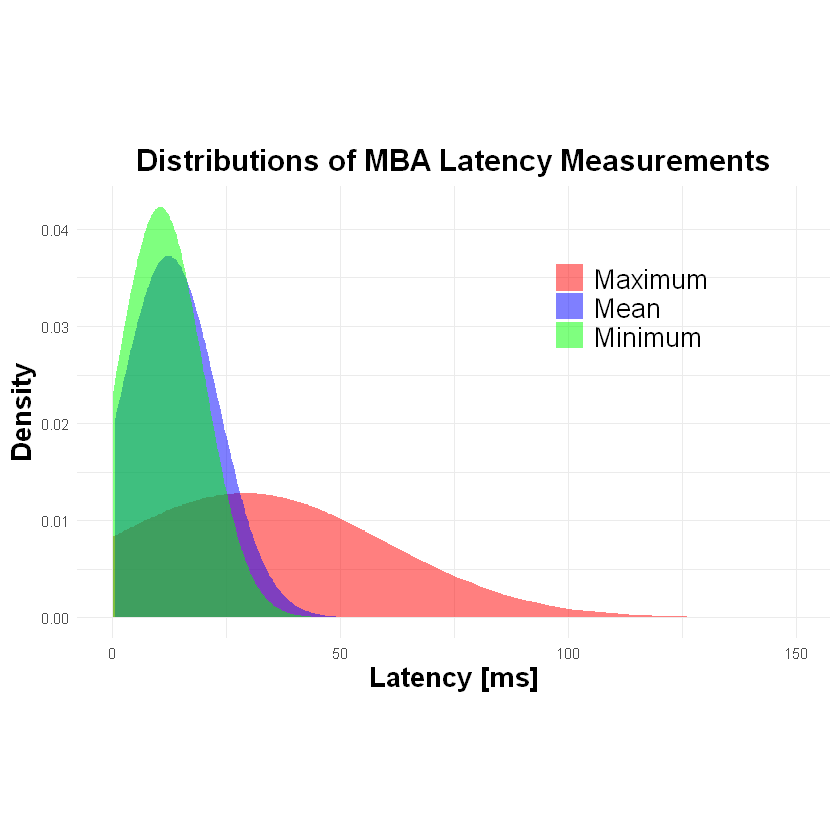

In [3]:
# Load necessary library
library(ggplot2)

# Reorder the columns to plot and rename them
ordered_columns <- c("All.hour.minimum.latency", "All.hour.trimmed.mean.latency", "All.hour.maximum.latency")
names(ordered_columns) <- c("Minimum", "Mean", "Maximum")

# Calculate the means and standard deviations for each column
normal_data <- lapply(seq_along(ordered_columns), function(i) {
  col <- ordered_columns[i]
  new_name <- names(ordered_columns)[i]
  
  column_data <- na.omit(as.numeric(mba_data[[col]]))  # Drop NA values
  mean_val <- mean(column_data)
  sd_val <- sd(column_data)
  
  # Create a range of x values for the normal distribution
  x_values <- seq(mean_val - 4 * sd_val, mean_val + 4 * sd_val, length.out = 100)
  density_values <- dnorm(x_values, mean = mean_val, sd = sd_val)
  
  data.frame(x = x_values, density = density_values, group = new_name)
})

# Combine the data frames into one
normal_kde_data <- do.call(rbind, normal_data)

# Create the plot
ggplot(normal_kde_data, aes(x = x, y = density, fill = group)) +
  geom_area(alpha = 0.5, position = 'identity') +  # Fill the area under the curve
  labs(
    title = "Distributions of MBA Latency Measurements",
    x = "Latency [ms]",
    y = "Density") +
  scale_fill_manual(values = c("Minimum" = "green", 
                                "Mean" = "blue", 
                                "Maximum" = "red")) +  # Fill colors
  xlim(0, 150) +  # Set x-axis limits
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 18),  # Center and bold title
    axis.title.x = element_text(face = "bold", size = 16),
    axis.title.y = element_text(face = "bold", size = 16),
    legend.title = element_blank(),  # Set legend title to blank
    legend.text = element_text(size = 16),  # Increase legend text size
    legend.position = c(0.85, 0.85),  # Position the legend in the upper right corner
    legend.justification = c("right", "top"),
    aspect.ratio = 0.6) # Set aspect ratio to 1


In [6]:
print(normal_kde_data)

              x      density   group
1   -27.1546008 1.419560e-05 Minimum
2   -26.3927756 1.954851e-05 Minimum
3   -25.6309505 2.674471e-05 Minimum
4   -24.8691254 3.635182e-05 Minimum
5   -24.1073002 4.908835e-05 Minimum
6   -23.3454751 6.585591e-05 Minimum
7   -22.5836499 8.777589e-05 Minimum
8   -21.8218248 1.162304e-04 Minimum
9   -21.0599996 1.529074e-04 Minimum
10  -20.2981745 1.998486e-04 Minimum
11  -19.5363493 2.595003e-04 Minimum
12  -18.7745242 3.347640e-04 Minimum
13  -18.0126990 4.290458e-04 Minimum
14  -17.2508739 5.463019e-04 Minimum
15  -16.4890487 6.910760e-04 Minimum
16  -15.7272236 8.685263e-04 Minimum
17  -14.9653985 1.084437e-03 Minimum
18  -14.2035733 1.345208e-03 Minimum
19  -13.4417482 1.657826e-03 Minimum
20  -12.6799230 2.029797e-03 Minimum
21  -11.9180979 2.469051e-03 Minimum
22  -11.1562727 2.983814e-03 Minimum
23  -10.3944476 3.582428e-03 Minimum
24   -9.6326224 4.273142e-03 Minimum
25   -8.8707973 5.063855e-03 Minimum
26   -8.1089721 5.961825e-03 Minimum
2

In [31]:
colnames(mba_data)

[1] "unit_id"                              
 [2] "connection_type"                      
 [3] "technology"                           
 [4] "tier"                                 
 [5] "rsp"                                  
 [6] "state_or_territory"                   
 [7] "geography"                            
 [8] "is_this_service_impaired"             
 [9] "is_this_service_underperforming"      
[10] "gateway_mac"                          
[11] "All.hour.trimmed.mean.download.speed" 
[12] "All.hour.minimum.download.speed"      
[13] "All.hour.maximum.download.speed"      
[14] "Busy.hour.trimmed.mean.download.speed"
[15] "Busy.hour.minimum.download.speed"     
[16] "Busy.hour.maximum.download.speed"     
[17] "All.hour.trimmed.mean.upload.speed"   
[18] "All.hour.minimum.upload.speed"        
[19] "All.hour.maximum.upload.speed"        
[20] "Busy.hour.trimmed.mean.upload.speed"  
[21] "Busy.hour.minimum.upload.speed"       
[22] "Busy.hour.maximum.upload.speed"       
[23] "All.hour.trimmed.mean.latency"        
[24] "All.hour.minimum.latency"             
[25] "All.hour.maximum.latency"             
[26] "Busy.hour.trimmed.mean.latency"       
[27] "Busy.hour.minimum.latency"            
[28] "Busy.hour.maximum.latency"            
[29] "Average.daily.outages"

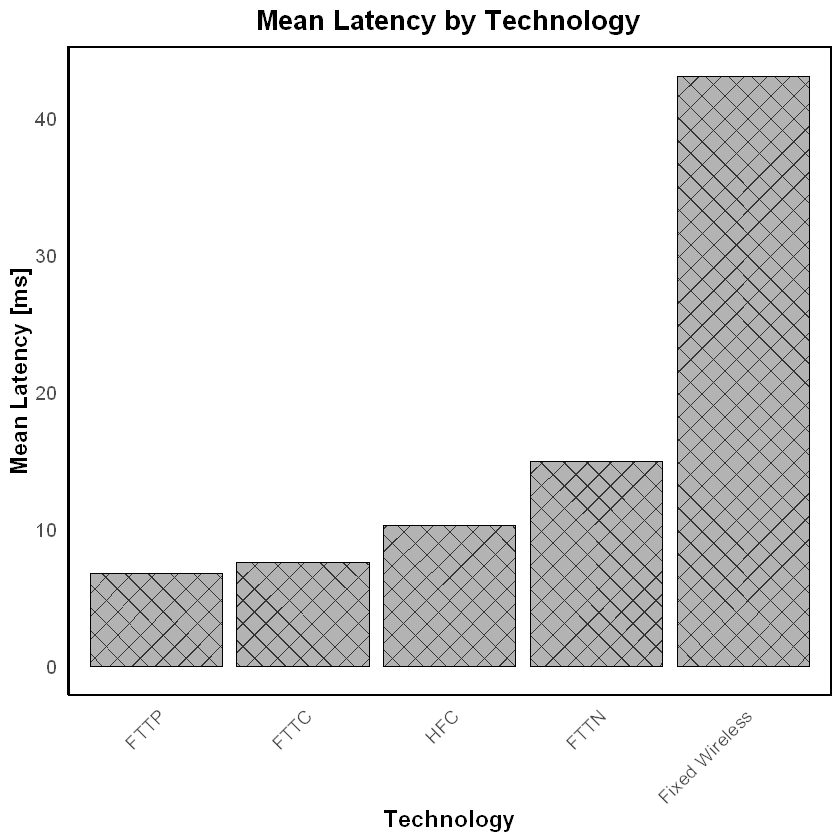

In [55]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(ggpattern)

# Calculate the mean latency by technology and rename technologies
mean_latency <- mba_data %>%
  group_by(technology) %>%
  summarize(mean_latency = mean(All.hour.trimmed.mean.latency, na.rm = TRUE)) %>%
  mutate(technology = recode(technology, 
                              "Fixed Wireless" = "Fixed Wireless",
                              "Fibre to the Premises" = "FTTP",
                              "Fibre to the Node" = "FTTN",
                              "Hybrid Fibre Coaxial" = "HFC",
                              "Fibre to the Curb" = "FTTC")) %>%
  arrange(mean_latency)  # Order by mean latency

# Create the bar chart with checkered pattern
ggplot(mean_latency, aes(x = reorder(technology, mean_latency), y = mean_latency)) +
  geom_bar_pattern(
    aes(pattern = "stripe"),  # Set pattern to stripe
    stat = "identity",
    fill = "grey70",  # Bar color
    color = "black",  # Border color
    size = 0.5,
    pattern_density = 0.01,  # Adjust density of the pattern
    pattern_fill = "grey50",  # Color of the pattern
    pattern_spacing = 0.025,  # Space between pattern elements
    pattern_angle = 45  # Set the pattern angle to 45 degrees
  ) +
  labs(
    title = "Mean Latency by Technology",
    x = "Technology",
    y = "Mean Latency [ms]"
  ) +
  theme_minimal(base_size = 14) +  # Use a minimal theme with base size
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16),  # Center and bold title
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    axis.line = element_line(color = "black"),  # Add x and y axis lines
    axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels by 45 degrees
    panel.border = element_rect(color = "black", fill = NA, size = 1),  # Add a solid black border
    panel.grid.major = element_blank(),  # Remove major grid lines
    panel.grid.minor = element_blank(),  # Remove minor grid lines
    legend.position = "none",  # Remove legend if it's not needed
    plot.margin = margin(5, 5, 5, 5)) +
  scale_y_continuous(breaks = scales::pretty_breaks(n = 5), limits = c(0, max(mean_latency$mean_latency)))

Warning message:
"package 'forcats' was built under R version 4.3.3"


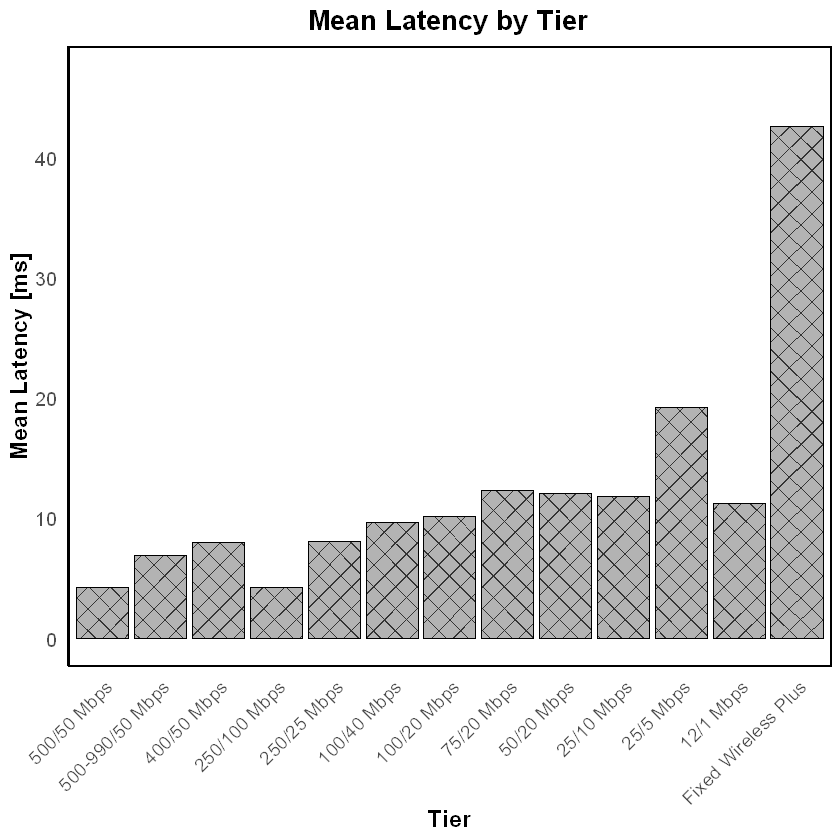

In [38]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(ggpattern)
library(forcats)  # For factor manipulation

# Define the tiers in the correct order based on leading numbers
tier_order <- c("500/50 Mbps", "500-990/50 Mbps", "400/50 Mbps", "250/100 Mbps", 
                "250/25 Mbps", "100/40 Mbps", "100/20 Mbps", 
                "75/20 Mbps", "50/20 Mbps", "25/10 Mbps", 
                "25/5 Mbps", "12/1 Mbps", "Fixed Wireless Plus")  # Last

# Calculate the mean latency by tier
mean_latency <- mba_data %>%
  group_by(tier) %>%
  summarize(mean_latency = mean(All.hour.trimmed.mean.latency, na.rm = TRUE)) %>%
  mutate(tier = factor(tier, levels = tier_order)) %>%  # Reorder tiers
  arrange(mean_latency)  # Order by mean latency

# Create the bar chart with checkered pattern
ggplot(mean_latency, aes(x = tier, y = mean_latency)) +
  geom_bar_pattern(
    aes(pattern = "stripe"),  # Set pattern to stripe
    stat = "identity",
    fill = "grey70",  # Bar color
    color = "black",  # Border color
    size = 0.5,
    pattern_density = 0.01,  # Adjust density of the pattern
    pattern_fill = "grey50",  # Color of the pattern
    pattern_spacing = 0.025,  # Space between pattern elements
    pattern_angle = 45  # Set the pattern angle to 45 degrees
  ) +
  labs(
    title = "Mean Latency by Tier",
    x = "Tier",
    y = "Mean Latency [ms]"
  ) +
  theme_minimal(base_size = 16) +  # Use a minimal theme with base size
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 18),  # Center and bold title
    axis.title.x = element_text(face = "bold", size = 16),
    axis.title.y = element_text(face = "bold", size = 16),
    axis.line = element_line(color = "black"),  # Add x and y axis lines
    panel.border = element_rect(color = "black", fill = NA, size = 1),  # Add a solid black border
    panel.grid.major = element_blank(),  # Remove major grid lines
    panel.grid.minor = element_blank(),  # Remove minor grid lines
    legend.position = "none",  # Remove legend if it's not needed
    plot.margin = margin(5, 5, 5, 5)  # Set margins
  ) +
  scale_y_continuous(breaks = scales::pretty_breaks(n = 5), limits = c(0, max(mean_latency$mean_latency) * 1.1)) +  # Add y-axis ticks and set limits
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels by 45 degrees


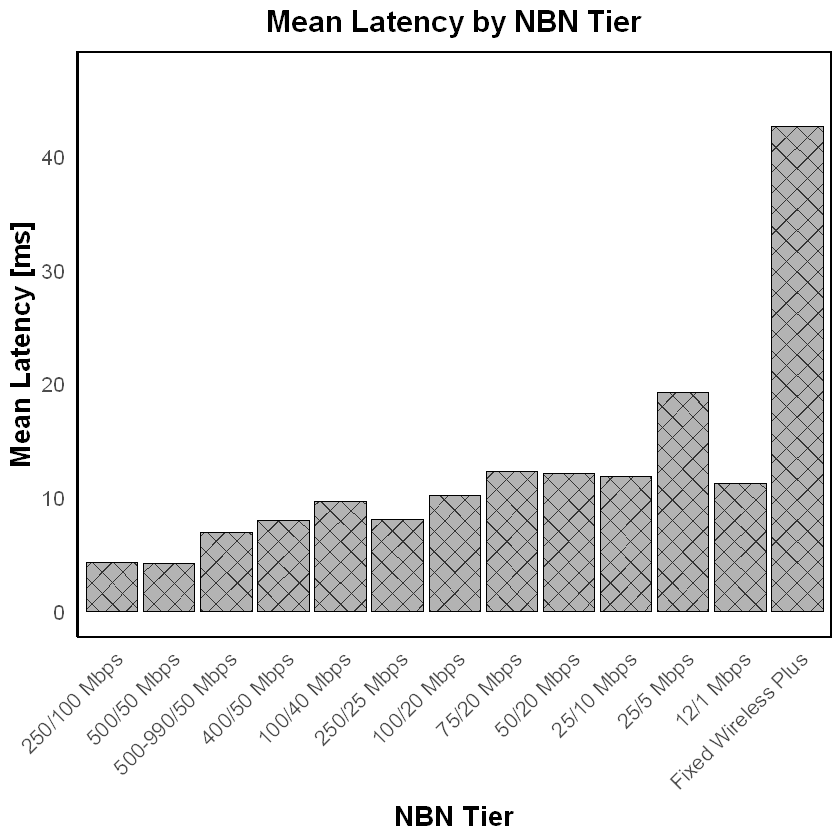

In [43]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(ggpattern)
library(forcats)  # For factor manipulation

# Define the tiers in the correct order based on backend numbers
tier_order <- c("250/100 Mbps", "500/50 Mbps", "500-990/50 Mbps",
                "400/50 Mbps", "100/40 Mbps", "250/25 Mbps", 
                "100/20 Mbps", "75/20 Mbps", "50/20 Mbps", 
                "25/10 Mbps", "25/5 Mbps", "12/1 Mbps", 
                "Fixed Wireless Plus")  # Last

# Calculate the mean latency by tier
mean_latency <- mba_data %>%
  group_by(tier) %>%
  summarize(mean_latency = mean(All.hour.trimmed.mean.latency, na.rm = TRUE)) %>%
  mutate(tier = factor(tier, levels = tier_order)) %>%  # Reorder tiers
  arrange(mean_latency)  # Order by mean latency

# Create the bar chart with checkered pattern
ggplot(mean_latency, aes(x = tier, y = mean_latency)) +
  geom_bar_pattern(
    aes(pattern = "stripe"),  # Set pattern to stripe
    stat = "identity",
    fill = "grey70",  # Bar color
    color = "black",  # Border color
    size = 0.5,
    pattern_density = 0.01,  # Adjust density of the pattern
    pattern_fill = "grey50",  # Color of the pattern
    pattern_spacing = 0.025,  # Space between pattern elements
    pattern_angle = 45  # Set the pattern angle to 45 degrees
  ) +
  labs(
    title = "Mean Latency by NBN Tier",
    x = "NBN Tier",
    y = "Mean Latency [ms]"
  ) +
  theme_minimal(base_size = 16) +  # Use a minimal theme with base size
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 18),  # Center and bold title
    axis.title.x = element_text(face = "bold", size = 16),
    axis.title.y = element_text(face = "bold", size = 16),
    axis.line = element_line(color = "black"),  # Add x and y axis lines
    panel.border = element_rect(color = "black", fill = NA, size = 1),  # Add a solid black border
    panel.grid.major = element_blank(),  # Remove major grid lines
    panel.grid.minor = element_blank(),  # Remove minor grid lines
    legend.position = "none",  # Remove legend if it's not needed
    plot.margin = margin(5, 5, 5, 5)  # Set margins
  ) +
  scale_y_continuous(breaks = scales::pretty_breaks(n = 5), limits = c(0, max(mean_latency$mean_latency) * 1.1)) +  # Add y-axis ticks and set limits
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels by 45 degrees


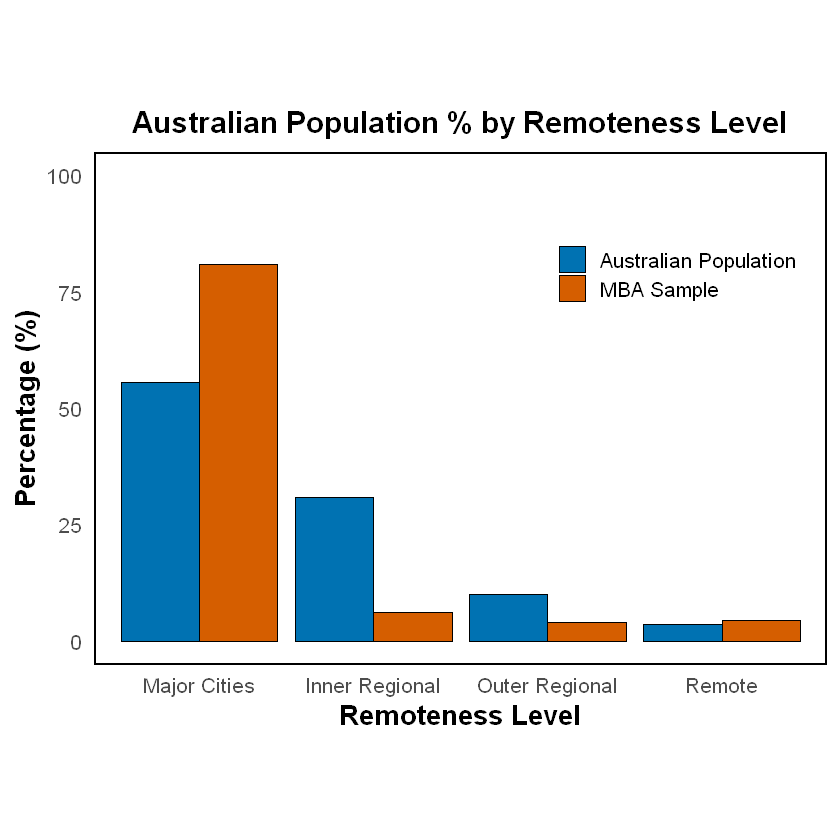

In [75]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(tidyr)

# Create the data frame
remoteness <- c("Major Cities", "Inner Regional", "Outer Regional", "Remote")
population <- c(55.50, 30.87, 9.97, 3.66)
mba_remoteness <- c(81.02, 6.28, 4.00, 4.49)

data <- data.frame(remoteness, population, mba_remoteness)

# Reshape data to long format for ggplot
data_long <- data %>%
  pivot_longer(cols = c(population, mba_remoteness), names_to = "category", values_to = "value") %>%
  mutate(category = recode(category,
                           population = "Australian Population",
                           mba_remoteness = "MBA Sample"),
         remoteness = factor(remoteness, levels = c("Major Cities", "Inner Regional", "Outer Regional", "Remote")))  # Set factor levels

# Create the bar chart
ggplot(data_long, aes(x = remoteness, y = value, fill = category)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9), color = "black", size = 0.5) +
  scale_fill_manual(values = c("Australian Population" = "#0072B2", "MBA Sample" = "#D55E00")) +  # Harsher colors
  labs(
    title = "Australian Population % by Remoteness Level",
    x = "Remoteness Level",
    y = "Percentage (%)",
    fill = ""  # Blank legend title
  ) +
  theme_minimal(base_size = 16) +  # Use a minimal theme with base size
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 18),  # Center and bold title
    axis.title.x = element_text(face = "bold", size = 16),
    axis.title.y = element_text(face = "bold", size = 16),
    panel.border = element_rect(color = "black", fill = NA, size = 1),  # Add a solid black border
    panel.grid.major = element_blank(),  # Remove major grid lines
    panel.grid.minor = element_blank(),  # Remove minor grid lines
    legend.position = c(0.8, 0.8),  # Position legend inside the plot area
    aspect.ratio = 0.7) +
    scale_y_continuous(limits = c(0, 100))  # Set y-axis limits from 0 to 100


## R vs Python Split

In [2]:
import initialise as init

In [3]:
adm_data = init.gpd.read_file('corrected_australia_adm2_percentiles.json')
adm_data.drop(['Busy 5th Percentile', 'Busy 10th Percentile', 'Busy 25th Percentile', 'Busy 50th Percentile', 'Busy 75th Percentile', 'Busy 90th Percentile', 'Busy 95th Percentile', 'Busy 95th:5th Ratio', 'Busy Sample Size'], axis=1, inplace=True)
adm_data.drop(['5th Percentile Change', '10th Percentile Change', '25th Percentile Change', '50th Percentile Change', '75th Percentile Change', '90th Percentile Change', '95th Percentile Change', '95th:5th Ratio Change'], axis=1, inplace=True)
print(adm_data.columns)
print()

mba_data = init.pd.read_csv('MBA_data.csv')

print(mba_data.columns)

Index(['fid', 'gid', 'id_0', 'iso', 'name_0', 'id_1', 'name_1', 'id_2',
       'name_2', '5th Percentile', '10th Percentile', '25th Percentile',
       '50th Percentile', '75th Percentile', '90th Percentile',
       '95th Percentile', '95th:5th Ratio', 'Sample Size', 'geometry'],
      dtype='object')

Index(['unit_id', 'connection_type', 'technology', 'tier', 'rsp',
       'state_or_territory', 'geography', 'is_this_service_impaired',
       'is_this_service_underperforming', 'gateway_mac',
       'All hour trimmed mean download speed',
       'All hour minimum download speed', 'All hour maximum download speed',
       'Busy hour trimmed mean download speed',
       'Busy hour minimum download speed', 'Busy hour maximum download speed',
       'All hour trimmed mean upload speed', 'All hour minimum upload speed',
       'All hour maximum upload speed', 'Busy hour trimmed mean upload speed',
       'Busy hour minimum upload speed', 'Busy hour maximum upload speed',
       'All hour tri

## Latency Range Summary

In [4]:
mba_latency_mean = mba_data['All hour trimmed mean latency']
mba_latency_min = mba_data['All hour minimum latency']
mba_latency_max = mba_data['All hour maximum latency']

In [5]:
import pandas as pd

# Assuming mba_latency_min, mba_latency_mean, and mba_latency_max are already defined
# Calculate summaries as DataFrames
def create_summary_df(latency_df, label):
    return pd.DataFrame({
        'Statistic:': ['Minimum:', '5th Percentile:', '25th Percentile:', '50th Percentile:', '75th Percentile:', '95th Percentile:', 'IQR:', 'Maximum:', 'Range:', 'n:'],
        'Value': [
            latency_df.min(),
            latency_df.quantile(0.05),
            latency_df.quantile(0.25),
            latency_df.quantile(0.50),
            latency_df.quantile(0.75),
            latency_df.quantile(0.95),
            latency_df.quantile(0.75) - latency_df.quantile(0.25),
            latency_df.max(),
            latency_df.max() - latency_df.min(),
            len(latency_df)
        ]
    })

# Create summary DataFrames for each latency
mba_min_summary_df = create_summary_df(mba_latency_min, 'Minimum')
mba_mean_summary_df = create_summary_df(mba_latency_mean, 'Mean')
mba_max_summary_df = create_summary_df(mba_latency_max, 'Maximum')

# Print the summaries in a format suitable for copying to Google Sheets
print("MBA Minimum Latency Summary:")
print(mba_min_summary_df.to_string(index=False))
print("\nMBA Mean Latency Summary:")
print(mba_mean_summary_df.to_string(index=False))
print("\nMBA Maximum Latency Summary:")
print(mba_max_summary_df.to_string(index=False))


MBA Minimum Latency Summary:
      Statistic:    Value
        Minimum:    1.060
 5th Percentile:    2.050
25th Percentile:    5.190
50th Percentile:    8.010
75th Percentile:   11.910
95th Percentile:   33.172
            IQR:    6.720
        Maximum:   65.700
          Range:   64.640
              n: 1449.000

MBA Mean Latency Summary:
      Statistic:    Value
        Minimum:    1.240
 5th Percentile:    2.242
25th Percentile:    5.660
50th Percentile:    9.560
75th Percentile:   14.320
95th Percentile:   37.658
            IQR:    8.660
        Maximum:   72.690
          Range:   71.450
              n: 1449.000

MBA Maximum Latency Summary:
      Statistic:    Value
        Minimum:    2.030
 5th Percentile:    5.382
25th Percentile:   12.440
50th Percentile:   19.860
75th Percentile:   34.820
95th Percentile:   83.040
            IQR:   22.380
        Maximum:  444.010
          Range:  441.980
              n: 1449.000


In [6]:
import pandas as pd
def calculate_summary(dataframe, column):
    return {
        'Group:': column,
        'Minimum:': dataframe[column].min(),  
        '5th Percentile:': dataframe[column].quantile(0.05),
        '50th Percentile:': dataframe[column].median(),
        '95th Percentile:': dataframe[column].quantile(0.95),
        'IQR:': dataframe[column].quantile(0.75) - dataframe[column].quantile(0.25),
        'Maximum:': dataframe[column].max(),
        'Range:': dataframe[column].max() - dataframe[column].min(),
        'Sample Size:': len(dataframe[column])
    }


# Assuming adm_data is already defined and contains the necessary columns
adm_data['5th Percentile'] = adm_data['5th Percentile'].astype(float)
adm_data['50th Percentile'] = adm_data['50th Percentile'].astype(float)
adm_data['95th Percentile'] = adm_data['95th Percentile'].astype(float)

# Drop rows with NaN in the relevant percentile columns
mipo_latency_min = adm_data.dropna(subset=['5th Percentile'])
mipo_latency_mean = adm_data.dropna(subset=['50th Percentile'])
mipo_latency_max = adm_data.dropna(subset=['95th Percentile'])

# Calculate summaries for each relevant column
min_summary = calculate_summary(mipo_latency_min, '5th Percentile')
mean_summary = calculate_summary(mipo_latency_mean, '50th Percentile')
max_summary = calculate_summary(mipo_latency_max, '95th Percentile')

# Convert summaries to DataFrames (wrap in a list)
min_summary_df = pd.DataFrame([min_summary])  # Wrap in a list to create a single-row DataFrame
mean_summary_df = pd.DataFrame([mean_summary])
max_summary_df = pd.DataFrame([max_summary])

# Concatenate all summaries into one DataFrame for easier copying
combined_summary_df = pd.concat([min_summary_df, mean_summary_df, max_summary_df], ignore_index=True)

# Print the combined summary in a tab-separated format
print(combined_summary_df.to_csv(sep='\t', index=False))


Group:	Minimum:	5th Percentile:	50th Percentile:	95th Percentile:	IQR:	Maximum:	Range:	Sample Size:
5th Percentile	109.1573580433286	146.52722668043862	187.59843672946306	262.1067277729024	54.57847442284432	870.3611111111111	761.2037530677825	826
50th Percentile	170.509329810901	268.10918536153093	311.0680437013187	370.9979133747846	36.12906678883758	938.8194444444443	768.3101146335433	826
95th Percentile	226.1777649584847	318.05648148148146	433.5338973566188	620.8690671513322	79.7352173527612	975.5627595476454	749.3849945891608	826



## Geography

In [7]:
RA = init.gpd.read_file('adm2 percentiles/RA_australian_lgas.geojson')
RA['RA fid'] -= 1
print(RA.columns)
print()

adm_to_lga = init.gpd.read_file('adm2 percentiles/ADM_to_LGA_Conversion.geojson')
print(adm_to_lga.columns)

Index(['year', 'ste_code', 'ste_name', 'lga_code', 'lga_name', 'lga_area_code',
       'lga_type', 'lga_name_long', 'RA fid', 'geometry'],
      dtype='object')

Index(['fid', 'gid', 'id_0', 'iso', 'name_0', 'id_1', 'name_1', 'id_2',
       'name_2', 'year', 'ste_code', 'ste_name', 'lga_code', 'lga_name',
       'lga_area_code', 'lga_type', 'lga_name_long', 'geometry'],
      dtype='object')


In [8]:
RA_lga = adm_to_lga.merge(RA, on='lga_code', how='left')
combined_adm = adm_data.merge(RA_lga, on='id_2', how='left')
print(combined_adm.columns)

Index(['fid_x', 'gid_x', 'id_0_x', 'iso_x', 'name_0_x', 'id_1_x', 'name_1_x',
       'id_2', 'name_2_x', '5th Percentile', '10th Percentile',
       '25th Percentile', '50th Percentile', '75th Percentile',
       '90th Percentile', '95th Percentile', '95th:5th Ratio', 'Sample Size',
       'geometry', 'fid_y', 'gid_y', 'id_0_y', 'iso_y', 'name_0_y', 'id_1_y',
       'name_1_y', 'name_2_y', 'year_x', 'ste_code_x', 'ste_name_x',
       'lga_code', 'lga_name_x', 'lga_area_code_x', 'lga_type_x',
       'lga_name_long_x', 'geometry_x', 'year_y', 'ste_code_y', 'ste_name_y',
       'lga_name_y', 'lga_area_code_y', 'lga_type_y', 'lga_name_long_y',
       'RA fid', 'geometry_y'],
      dtype='object')


In [9]:
# indexes for each level of remoteness
mc_index = [ 0,  7, 13, 20, 27, 34, 45]
ir_index = [ 1,  8, 14, 21, 28, 35, 46]
or_index = [ 2,  9, 15, 22, 29, 36, 40]
r_index =  [ 3, 10, 16, 23, 30, 37, 41]
vr_index = [ 4, 17, 24, 31, 42]
indexes_list = [mc_index, ir_index, or_index, r_index, vr_index]

In [10]:
combined_adm['Major City'] = 0
combined_adm['Inner Regional'] = 0
combined_adm['Outer Regional'] = 0
combined_adm['Remote'] = 0
combined_adm['Very Remote'] = 0
combined_adm['error RA'] = 0

for i, indexes in enumerate(combined_adm['RA fid']):
    if indexes in mc_index:
        combined_adm['Major City'][i] = 1
    elif indexes in ir_index:
        combined_adm['Inner Regional'][i] = 1
    elif indexes in or_index:
        combined_adm['Outer Regional'][i] = 1
    elif indexes in r_index:
        combined_adm['Remote'][i] = 1
    elif indexes in vr_index:
        combined_adm['Very Remote'][i] = 1
    else:
        if combined_adm['name_2_x'][i] == 'Jervis Bay':
            combined_adm.iloc[i]['Inner Regional'] = 1
        
        else:
            combined_adm['error RA'][i] = 1
            print('Error: index not found')

C:\Users\43472\AppData\Local\Temp\ipykernel_14824\2188953502.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_adm['Inner Regional'][i] = 1
C:\Users\43472\AppData\Local\Temp\ipykernel_14824\2188953502.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_adm.iloc[i]['Inner Regional'] = 1
C:\Users\43472\AppData\Local\Temp\ipykernel_14824\2188953502.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_adm['Ou

In [11]:
# Split MBA data into remoteness areas
print(mba_data['geography'].unique())
mba_mc = mba_data[mba_data['geography'] == 'Urban']
mba_ir = mba_data[mba_data['geography'] == 'Major Rural']
mba_or = mba_data[mba_data['geography'] == 'Minor Rural']
mba_r = mba_data[mba_data['geography'] == 'Remote']
mba_nan = mba_data[mba_data['geography'].isna()]

# Split MIPO data into remoteness areas
mipo_mc = combined_adm[combined_adm['Major City'] == 1]
mipo_mc = mipo_mc.dropna(subset=['5th Percentile'])
mipo_mc = mipo_mc.dropna(subset=['50th Percentile'])
mipo_mc = mipo_mc.dropna(subset=['95th Percentile'])

mipo_ir = combined_adm[combined_adm['Inner Regional'] == 1]
mipo_ir = mipo_ir.dropna(subset=['5th Percentile'])
mipo_ir = mipo_ir.dropna(subset=['50th Percentile'])
mipo_ir = mipo_ir.dropna(subset=['95th Percentile'])

mipo_or = combined_adm[combined_adm['Outer Regional'] == 1]
mipo_or = mipo_or.dropna(subset=['5th Percentile'])
mipo_or = mipo_or.dropna(subset=['50th Percentile'])
mipo_or = mipo_or.dropna(subset=['95th Percentile'])

mipo_r = combined_adm[(combined_adm['Remote'] == 1) | (combined_adm['Very Remote'] == 1)]
mipo_r = mipo_r.dropna(subset=['5th Percentile'])
mipo_r = mipo_r.dropna(subset=['50th Percentile'])
mipo_r = mipo_r.dropna(subset=['95th Percentile'])

['Remote' 'Urban' 'Minor Rural' nan 'Major Rural']


In [12]:
print(mba_mc.columns)

Index(['unit_id', 'connection_type', 'technology', 'tier', 'rsp',
       'state_or_territory', 'geography', 'is_this_service_impaired',
       'is_this_service_underperforming', 'gateway_mac',
       'All hour trimmed mean download speed',
       'All hour minimum download speed', 'All hour maximum download speed',
       'Busy hour trimmed mean download speed',
       'Busy hour minimum download speed', 'Busy hour maximum download speed',
       'All hour trimmed mean upload speed', 'All hour minimum upload speed',
       'All hour maximum upload speed', 'Busy hour trimmed mean upload speed',
       'Busy hour minimum upload speed', 'Busy hour maximum upload speed',
       'All hour trimmed mean latency', 'All hour minimum latency',
       'All hour maximum latency', 'Busy hour trimmed mean latency',
       'Busy hour minimum latency', 'Busy hour maximum latency',
       'Average daily outages'],
      dtype='object')


In [13]:
# Create a list to hold summaries
summaries = []

# Compute summaries for MBA data
summaries.append(calculate_summary(mba_mc, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_mc, 'All hour trimmed mean latency'))
summaries.append(calculate_summary(mba_mc, 'All hour minimum latency'))

summaries.append(calculate_summary(mba_ir, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_ir, 'All hour trimmed mean latency'))
summaries.append(calculate_summary(mba_ir, 'All hour minimum latency'))

summaries.append(calculate_summary(mba_or, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_or, 'All hour trimmed mean latency'))
summaries.append(calculate_summary(mba_ir, 'All hour minimum latency'))

summaries.append(calculate_summary(mba_r, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_r, 'All hour trimmed mean latency'))
summaries.append(calculate_summary(mba_r, 'All hour minimum latency'))

summaries.append(calculate_summary(mba_nan, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_nan, 'All hour trimmed mean latency'))
summaries.append(calculate_summary(mba_nan, 'All hour minimum latency'))

# Compute summaries for MIPO data
summaries.append(calculate_summary(mipo_mc, '95th Percentile'))
summaries.append(calculate_summary(mipo_mc, '50th Percentile'))
summaries.append(calculate_summary(mipo_mc, '5th Percentile'))

summaries.append(calculate_summary(mipo_ir, '95th Percentile'))
summaries.append(calculate_summary(mipo_ir, '50th Percentile'))
summaries.append(calculate_summary(mipo_ir, '5th Percentile'))

summaries.append(calculate_summary(mipo_or, '95th Percentile'))
summaries.append(calculate_summary(mipo_or, '50th Percentile'))
summaries.append(calculate_summary(mipo_or, '5th Percentile'))

summaries.append(calculate_summary(mipo_r, '95th Percentile'))
summaries.append(calculate_summary(mipo_r, '50th Percentile'))
summaries.append(calculate_summary(mipo_r, '5th Percentile'))

# Create a DataFrame from summaries
summary_df = pd.DataFrame(summaries)

# Print the combined summary in a tab-separated format
print(summary_df.to_csv(sep='\t', index=False))

Group:	Minimum:	5th Percentile:	50th Percentile:	95th Percentile:	IQR:	Maximum:	Range:	Sample Size:
All hour maximum latency	2.03	5.3635	18.770000000000003	77.55049999999997	19.637500000000003	399.73	397.70000000000005	1174
All hour trimmed mean latency	1.24	2.23	9.09	23.502499999999994	7.165000000000001	63.35	62.11	1174
All hour minimum latency	1.06	2.01	7.705	20.1875	5.039999999999999	59.23	58.169999999999995	1174
All hour maximum latency	5.86	11.36	24.13	57.66	14.740000000000002	92.66	86.8	91
All hour trimmed mean latency	2.24	3.785	13.2	34.925	7.150000000000002	48.76	46.519999999999996	91
All hour minimum latency	1.8	3.315	10.43	25.384999999999998	6.040000000000001	45.26	43.46	91
All hour maximum latency	3.9	8.022499999999999	26.005000000000003	103.44999999999999	33.8425	444.01	440.11	58
All hour trimmed mean latency	2.49	2.7825	16.595	50.56	15.14	54.95	52.46	58
All hour minimum latency	1.8	3.315	10.43	25.384999999999998	6.040000000000001	45.26	43.46	91
All hour maximum latency	12.

### Breaking the MIPO data down one further level

In [14]:
# read in the tsv files
jan_data = init.pd.read_csv('adm2 percentiles/ipobs-AUS-adm2-2024-01_3hrly.tsv', sep='\t')
feb_data = init.pd.read_csv('adm2 percentiles/ipobs-AUS-adm2-2024-02_3hrly.tsv', sep='\t')
mar_data = init.pd.read_csv('adm2 percentiles/ipobs-AUS-adm2-2024-03_3hrly.tsv', sep='\t')
apr_data = init.pd.read_csv('adm2 percentiles/ipobs-AUS-adm2-2024-04_3hrly.tsv', sep='\t')
may_data = init.pd.read_csv('adm2 percentiles/ipobs-AUS-adm2-2024-05_3hrly.tsv', sep='\t')
jun_data = init.pd.read_csv('adm2 percentiles/ipobs-AUS-adm2-2024-06_3hrly.tsv', sep='\t')
jul_data = init.pd.read_csv('adm2 percentiles/ipobs-AUS-adm2-2024-07_3hrly.tsv', sep='\t')

# Print the columns of the data
print(jan_data.columns)

Index(['time_e', 'time_e_str', 'record_date', 'country_iso_three_char_code',
       'country_iso_name', 'adm1_name', 'adm2_name', 'adm1_unique_identifier',
       'adm2_unique_identifier', 'number_unique_active_ips_in_sample',
       'rtt_variance_norm', 'rtt_mean_norm', 'rtt_pctle_5', 'rtt_pctle_10',
       'rtt_pctle_25', 'rtt_pctle_50', 'rtt_pctle_75', 'rtt_pctle_90',
       'rtt_pctle_95', 'day_indicator'],
      dtype='object')


In [15]:
def get_max_unique_ips_with_names(month_data):
    # Group by 'adm2_unique_identifier', 'adm2_name', and 'adm1_name' to get the maximum IPs
    max_ips_df = (
        month_data.groupby(['adm2_unique_identifier', 'adm2_name', 'adm1_name'])
        .agg({'number_unique_active_ips_in_sample': 'max'})
        .reset_index()
    )
    max_ips_df.rename(columns={'number_unique_active_ips_in_sample': 'Max Unique IPs'}, inplace=True)
    
    return max_ips_df

# List of monthly dataframes
monthly_dataframes = [jan_data, feb_data, mar_data, apr_data, may_data, jun_data, jul_data]

# Initialize overall max DataFrame
overall_max_df = init.pd.DataFrame()

# Process each month's data
for month_df in monthly_dataframes:
    monthly_max_df = get_max_unique_ips_with_names(month_df)
    
    # Merge into the overall DataFrame
    overall_max_df = init.pd.concat([overall_max_df, monthly_max_df], ignore_index=True)

# Now get the maximum for each ADM across all months
overall_max_df = (
    overall_max_df.groupby(['adm2_unique_identifier', 'adm2_name', 'adm1_name'])
    .agg({'Max Unique IPs': 'max'})
    .reset_index()
)

# Print the overall max DataFrame
#print(overall_max_df)

# Calculate the total of Overall Max Unique IPs
total_unique_ips = overall_max_df['Max Unique IPs'].sum()
print("Total Overall Max Unique IPs across all ADMs:", total_unique_ips)


Total Overall Max Unique IPs across all ADMs: 308044


In [16]:
print(combined_adm.columns)

Index(['fid_x', 'gid_x', 'id_0_x', 'iso_x', 'name_0_x', 'id_1_x', 'name_1_x',
       'id_2', 'name_2_x', '5th Percentile', '10th Percentile',
       '25th Percentile', '50th Percentile', '75th Percentile',
       '90th Percentile', '95th Percentile', '95th:5th Ratio', 'Sample Size',
       'geometry', 'fid_y', 'gid_y', 'id_0_y', 'iso_y', 'name_0_y', 'id_1_y',
       'name_1_y', 'name_2_y', 'year_x', 'ste_code_x', 'ste_name_x',
       'lga_code', 'lga_name_x', 'lga_area_code_x', 'lga_type_x',
       'lga_name_long_x', 'geometry_x', 'year_y', 'ste_code_y', 'ste_name_y',
       'lga_name_y', 'lga_area_code_y', 'lga_type_y', 'lga_name_long_y',
       'RA fid', 'geometry_y', 'Major City', 'Inner Regional',
       'Outer Regional', 'Remote', 'Very Remote', 'error RA'],
      dtype='object')


In [17]:
combined_adm['Max Unique IPs'] = 0
overall_max_df['Transferred'] = 0

for i, adm_id in enumerate(combined_adm['name_2_x']):
    if adm_id in overall_max_df['adm2_name'].values:
        if combined_adm.iloc[i]['name_1_x'] == overall_max_df['adm1_name'][overall_max_df['adm2_name'] == adm_id].values[0]:
            combined_adm['Max Unique IPs'][i] = overall_max_df['Max Unique IPs'][overall_max_df['adm2_name'] == adm_id].values[0]
            overall_max_df['Transferred'][overall_max_df['adm2_name'] == adm_id] = 1

    else:
        combined_adm['Max Unique IPs'][i] = 0

C:\Users\43472\AppData\Local\Temp\ipykernel_14824\3387352456.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_adm['Max Unique IPs'][i] = overall_max_df['Max Unique IPs'][overall_max_df['adm2_name'] == adm_id].values[0]
C:\Users\43472\AppData\Local\Temp\ipykernel_14824\3387352456.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_max_df['Transferred'][overall_max_df['adm2_name'] == adm_id] = 1
C:\Users\43472\AppData\Local\Temp\ipykernel_14824\3387352456.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

In [18]:
# Print Max Unique IPs for each ADM
print(len(combined_adm[combined_adm['Max Unique IPs'] != 0]))

821


In [19]:
mipo_mc = combined_adm[combined_adm['Major City'] == 1]
mipo_ir = combined_adm[combined_adm['Inner Regional'] == 1]
mipo_or = combined_adm[combined_adm['Outer Regional'] == 1]
mipo_r = combined_adm[(combined_adm['Remote'] == 1) | (combined_adm['Very Remote'] == 1)]

print('At least', mipo_mc['Max Unique IPs'].sum(),'Major City IPs')
print('At least', mipo_ir['Max Unique IPs'].sum(),'Inner Regional IPs')
print('At least', mipo_or['Max Unique IPs'].sum(),'Outer Regional IPs')
print('At least', mipo_r['Max Unique IPs'].sum(),'Remote & Very Remote IPs')

At least 201859 Major City IPs
At least 73249 Inner Regional IPs
At least 10741 Outer Regional IPs
At least 9293 Remote & Very Remote IPs


In [20]:
201859 + 73239 + 10741 + 9293

295132

In [21]:
print(overall_max_df[overall_max_df['adm2_name'] == 'Saibai'])

    adm2_unique_identifier adm2_name   adm1_name  Max Unique IPs  Transferred
666              AUS-6-786    Saibai  Queensland               8            0


## Connection Type

In [22]:
print(mba_data['connection_type'].unique())

['NBN_FW' 'NBN' 'Non-NBN fixed line services'
 'NBN very high speed services']


In [23]:
mba_nbnfw = mba_data[mba_data['connection_type'] == 'NBN_FW']
mba_plain = mba_data[mba_data['connection_type'] == 'NBN']
mba_non = mba_data[mba_data['connection_type'] == 'Non-NBN fixed line services']
mba_high_speed = mba_data[mba_data['connection_type'] == 'NBN very high speed services']

In [24]:
summaries = []

# Compute summaries for MBA data
summaries.append(calculate_summary(mba_nbnfw, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_nbnfw, 'All hour trimmed mean latency'))
summaries.append(calculate_summary(mba_nbnfw, 'All hour minimum latency'))

summaries.append(calculate_summary(mba_plain, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_plain, 'All hour trimmed mean latency'))
summaries.append(calculate_summary(mba_plain, 'All hour minimum latency'))

summaries.append(calculate_summary(mba_non, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_non, 'All hour trimmed mean latency'))
summaries.append(calculate_summary(mba_non, 'All hour minimum latency'))

summaries.append(calculate_summary(mba_high_speed, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_high_speed, 'All hour trimmed mean latency'))
summaries.append(calculate_summary(mba_high_speed, 'All hour minimum latency'))

# Create a DataFrame from summaries
summary_df = pd.DataFrame(summaries)

# Print the combined summary in a tab-separated format
print(summary_df.to_csv(sep='\t', index=False))

Group:	Minimum:	5th Percentile:	50th Percentile:	95th Percentile:	IQR:	Maximum:	Range:	Sample Size:
All hour maximum latency	36.79	40.748000000000005	59.32	146.41	24.260000000000005	203.66	166.87	85
All hour trimmed mean latency	29.37	31.438000000000002	42.44	55.38399999999999	13.469999999999999	72.69	43.31999999999999	85
All hour minimum latency	23.05	26.512	37.36	51.751999999999995	11.999999999999996	65.7	42.650000000000006	85
All hour maximum latency	2.03	6.447	20.045	77.60149999999993	19.3625	444.01	441.98	1171
All hour trimmed mean latency	1.44	2.4935	9.705	23.835999999999995	6.8149999999999995	63.35	61.910000000000004	1171
All hour minimum latency	1.35	2.2235	8.03	20.524999999999984	5.5025	59.23	57.879999999999995	1171
All hour maximum latency	3.91	4.096	8.115	80.54749999999999	10.0975	88.97	85.06	60
All hour trimmed mean latency	1.69	1.8755	3.615	11.613999999999999	2.8000000000000003	21.73	20.04	60
All hour minimum latency	1.53	1.6484999999999999	3.035	9.272499999999999	2.907499

## Technology

In [25]:
print(mba_data['technology'].unique())

['Fixed Wireless' 'Fibre to the Premises' 'Fibre to the Node'
 'Hybrid Fibre Coaxial' 'Fibre to the Curb']


In [26]:
mba_fw = mba_data[mba_data['technology'] == 'Fixed Wireless']
mba_fttp = mba_data[mba_data['technology'] == 'Fibre to the Premises']
mba_fttn = mba_data[mba_data['technology'] == 'Fibre to the Node']
mba_hfc = mba_data[mba_data['technology'] == 'Hybrid Fibre Coaxial']
mba_fttc = mba_data[mba_data['technology'] == 'Fibre to the Curb']

In [27]:
summaries = []

# Compute summaries for MBA data
summaries.append(calculate_summary(mba_fw, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_fw, 'All hour trimmed mean latency'))
summaries.append(calculate_summary(mba_fw, 'All hour minimum latency'))

summaries.append(calculate_summary(mba_fttp, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_fttp, 'All hour trimmed mean latency'))
summaries.append(calculate_summary(mba_fttp, 'All hour minimum latency'))

summaries.append(calculate_summary(mba_fttn, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_fttn, 'All hour trimmed mean latency'))
summaries.append(calculate_summary(mba_fttn, 'All hour minimum latency'))

summaries.append(calculate_summary(mba_hfc, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_hfc, 'All hour trimmed mean latency'))
summaries.append(calculate_summary(mba_hfc, 'All hour minimum latency'))

summaries.append(calculate_summary(mba_fttc, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_fttc, 'All hour trimmed mean latency'))
summaries.append(calculate_summary(mba_fttc, 'All hour minimum latency'))

# Create a DataFrame from summaries
summary_df = pd.DataFrame(summaries)

# Print the combined summary in a tab-separated format
print(summary_df.to_csv(sep='\t', index=False))

Group:	Minimum:	5th Percentile:	50th Percentile:	95th Percentile:	IQR:	Maximum:	Range:	Sample Size:
All hour maximum latency	36.79	40.748000000000005	59.32	146.41	24.260000000000005	203.66	166.87	85
All hour trimmed mean latency	29.37	31.438000000000002	42.44	55.38399999999999	13.469999999999999	72.69	43.31999999999999	85
All hour minimum latency	23.05	26.512	37.36	51.751999999999995	11.999999999999996	65.7	42.650000000000006	85
All hour maximum latency	2.03	3.79	12.715	57.2	14.559999999999999	128.1	126.07	477
All hour trimmed mean latency	1.24	1.8775	3.815	17.4875	4.9275	63.35	62.11	477
All hour minimum latency	1.06	1.67	3.425	16.549999999999997	4.2925	53.71	52.65	477
All hour maximum latency	6.39	12.54	25.494999999999997	90.79449999999997	18.6925	444.01	437.62	492
All hour trimmed mean latency	4.6	8.3125	12.645	26.167999999999992	8.045000000000002	62.14	57.54	492
All hour minimum latency	4.37	5.77	9.515	22.320499999999996	7.255	59.23	54.86	492
All hour maximum latency	8.28	9.82	17.21

## Tier

In [28]:
print(mba_data['tier'].unique())

['Fixed Wireless Plus' '50/20 Mbps' '75/20 Mbps' '100/40 Mbps'
 '250/100 Mbps' '100/20 Mbps' '12/1 Mbps' '25/5 Mbps' '25/10 Mbps'
 '400/50 Mbps' '500-990/50 Mbps' '250/25 Mbps' '500/50 Mbps']


In [29]:
mba_fwp = mba_data[mba_data['tier'] == 'Fixed Wireless Plus']
mba_50_20 = mba_data[mba_data['tier'] == '50/20 Mbps']
mba_75_20 = mba_data[mba_data['tier'] == '75/20 Mbps']
mba_100_40 = mba_data[mba_data['tier'] == '100/40 Mbps']
mba_250_100 = mba_data[mba_data['tier'] == '250/100 Mbps']
mba_100_20 = mba_data[mba_data['tier'] == '100/20 Mbps']
mba_12_1 = mba_data[mba_data['tier'] == '12/1 Mbps']
mba_25_5 = mba_data[mba_data['tier'] == '25/5 Mbps']
mba_25_10 = mba_data[mba_data['tier'] == '25/10 Mbps']
mba_400_50 = mba_data[mba_data['tier'] == '400/50 Mbps']
mba_500_990_50 = mba_data[mba_data['tier'] == '500-990/50 Mbps']
mba_250_25 = mba_data[mba_data['tier'] == '250/25 Mbps']
mba_500_50 = mba_data[mba_data['tier'] == '500/50 Mbps']

In [30]:
summaries = []

# Compute summaries for MBA data
#summaries.append(calculate_summary(mba_fwp, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_fwp, 'All hour trimmed mean latency'))
#summaries.append(calculate_summary(mba_fwp, 'All hour minimum latency'))

#summaries.append(calculate_summary(mba_50_20, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_50_20, 'All hour trimmed mean latency'))
#summaries.append(calculate_summary(mba_50_20, 'All hour minimum latency'))

#summaries.append(calculate_summary(mba_75_20, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_75_20, 'All hour trimmed mean latency'))
#summaries.append(calculate_summary(mba_75_20, 'All hour minimum latency'))

#summaries.append(calculate_summary(mba_100_40, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_100_40, 'All hour trimmed mean latency'))
#summaries.append(calculate_summary(mba_100_40, 'All hour minimum latency'))

#summaries.append(calculate_summary(mba_250_100, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_250_100, 'All hour trimmed mean latency'))
#summaries.append(calculate_summary(mba_250_100, 'All hour minimum latency'))

#summaries.append(calculate_summary(mba_100_20, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_100_20, 'All hour trimmed mean latency'))
#summaries.append(calculate_summary(mba_100_20, 'All hour minimum latency'))

#summaries.append(calculate_summary(mba_12_1, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_12_1, 'All hour trimmed mean latency'))
#summaries.append(calculate_summary(mba_12_1, 'All hour minimum latency'))

#summaries.append(calculate_summary(mba_25_5, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_25_5, 'All hour trimmed mean latency'))
#summaries.append(calculate_summary(mba_25_5, 'All hour minimum latency'))

#summaries.append(calculate_summary(mba_25_10, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_25_10, 'All hour trimmed mean latency'))
#summaries.append(calculate_summary(mba_25_10, 'All hour minimum latency'))

#summaries.append(calculate_summary(mba_400_50, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_400_50, 'All hour trimmed mean latency'))
#summaries.append(calculate_summary(mba_400_50, 'All hour minimum latency'))

#summaries.append(calculate_summary(mba_500_990_50, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_500_990_50, 'All hour trimmed mean latency'))
#summaries.append(calculate_summary(mba_500_990_50, 'All hour minimum latency'))

#summaries.append(calculate_summary(mba_250_25, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_250_25, 'All hour trimmed mean latency'))
#summaries.append(calculate_summary(mba_250_25, 'All hour minimum latency'))

#summaries.append(calculate_summary(mba_500_50, 'All hour maximum latency'))
summaries.append(calculate_summary(mba_500_50, 'All hour trimmed mean latency'))
#summaries.append(calculate_summary(mba_500_50, 'All hour minimum latency'))

# Create a DataFrame from summaries
summary_df = pd.DataFrame(summaries)

# Print the combined summary in a tab-separated format
print(summary_df.to_csv(sep='\t', index=False))

Group:	Minimum:	5th Percentile:	50th Percentile:	95th Percentile:	IQR:	Maximum:	Range:	Sample Size:
All hour trimmed mean latency	29.37	31.548000000000002	41.415	55.31399999999999	13.302499999999995	72.69	43.31999999999999	70
All hour trimmed mean latency	1.81	2.796	10.43	24.073999999999998	7.090000000000001	62.14	60.33	576
All hour trimmed mean latency	8.61	8.6625	9.809999999999999	21.815499999999997	2.49	24.08	15.469999999999999	8
All hour trimmed mean latency	1.77	2.3960000000000004	8.51	23.672	6.6125	63.35	61.58	184
All hour trimmed mean latency	2.42	2.435	4.71	6.178	2.5149999999999997	6.4	3.9800000000000004	7
All hour trimmed mean latency	1.69	2.263	9.01	22.071499999999993	7.5125	59.16	57.47	254
All hour trimmed mean latency	1.95	2.2035	11.89	19.84	7.1075	22.57	20.62	14
All hour trimmed mean latency	2.23	3.5090000000000003	13.3	50.664999999999985	19.325	57.94	55.71	67
All hour trimmed mean latency	3.13	3.25	10.945	22.8375	6.2775	28.65	25.52	36
All hour trimmed mean latency	1.76	2.

## State Comparison

In [31]:
print(mba_data['state_or_territory'].unique())

['NSW' 'VIC' 'QLD' 'TAS' 'WA' 'NT + SA' 'ACT']


In [32]:
mba_nsw = mba_data[mba_data['state_or_territory'] == 'NSW'] 
mba_vic = mba_data[mba_data['state_or_territory'] == 'VIC']
mba_qld = mba_data[mba_data['state_or_territory'] == 'QLD']
mba_tas = mba_data[mba_data['state_or_territory'] == 'TAS']
mba_wa = mba_data[mba_data['state_or_territory'] == 'WA']
mba_nt_sa = mba_data[mba_data['state_or_territory'] == 'NT + SA']
mba_act = mba_data[mba_data['state_or_territory'] == 'ACT']

In [33]:
summaries = []

# Compute summaries for MBA data
summaries.append(calculate_summary(mba_nsw, 'All hour trimmed mean latency'))
summaries.append(calculate_summary(mba_vic, 'All hour trimmed mean latency'))
summaries.append(calculate_summary(mba_qld, 'All hour trimmed mean latency'))
summaries.append(calculate_summary(mba_tas, 'All hour trimmed mean latency'))
summaries.append(calculate_summary(mba_wa, 'All hour trimmed mean latency'))
summaries.append(calculate_summary(mba_nt_sa, 'All hour trimmed mean latency'))
summaries.append(calculate_summary(mba_act, 'All hour trimmed mean latency'))

# Create a DataFrame from summaries
summary_df = pd.DataFrame(summaries)

# Print the combined summary in a tab-separated format
print(summary_df.to_csv(sep='\t', index=False))

Group:	Minimum:	5th Percentile:	50th Percentile:	95th Percentile:	IQR:	Maximum:	Range:	Sample Size:
All hour trimmed mean latency	1.24	2.454	8.98	35.68199999999984	7.58	57.94	56.699999999999996	467
All hour trimmed mean latency	1.52	2.0774999999999997	8.64	33.8925	7.485	51.58	50.059999999999995	407
All hour trimmed mean latency	1.44	2.08	9.61	34.862500000000004	7.104999999999999	48.76	47.32	232
All hour trimmed mean latency	9.1	9.25	15.0	46.288999999999994	7.970000000000002	54.63	45.53	67
All hour trimmed mean latency	1.74	2.3104999999999998	9.129999999999999	48.6565	7.87	62.14	60.4	124
All hour trimmed mean latency	11.1	12.72	20.27	52.25	10.29	72.69	61.589999999999996	81
All hour trimmed mean latency	2.4	5.756	11.09	17.921	7.3925	26.24	23.84	71



### MIPO time

In [34]:
print(combined_adm['name_1_x'].unique())

['Australian Capital Territory' 'New South Wales' 'Northern Territory'
 'Queensland' 'South Australia' 'Tasmania' 'Victoria' 'Western Australia']


In [35]:
mipo_nsw = combined_adm[combined_adm['name_1_x'] == 'New South Wales']
mipo_vic = combined_adm[combined_adm['name_1_x'] == 'Victoria']
mipo_qld = combined_adm[combined_adm['name_1_x'] == 'Queensland']
mipo_tas = combined_adm[combined_adm['name_1_x'] == 'Tasmania']
mipo_wa = combined_adm[combined_adm['name_1_x'] == 'Western Australia']
mipo_nt_sa = combined_adm[(combined_adm['name_1_x'] == 'Northern Territory') | (combined_adm['name_1_x'] == 'South Australia')]
mipo_act = combined_adm[combined_adm['name_1_x'] == 'Australian Capital Territory']

In [36]:
summaries = []

# Compute summaries for MIPO data
summaries.append(calculate_summary(mipo_nsw, '50th Percentile'))
summaries.append(calculate_summary(mipo_vic, '50th Percentile'))
summaries.append(calculate_summary(mipo_qld, '50th Percentile'))
summaries.append(calculate_summary(mipo_tas, '50th Percentile'))
summaries.append(calculate_summary(mipo_wa, '50th Percentile'))
summaries.append(calculate_summary(mipo_nt_sa, '50th Percentile'))
summaries.append(calculate_summary(mipo_act, '50th Percentile'))

# Create a DataFrame from summaries
summary_df = pd.DataFrame(summaries)

# Print the combined summary in a tab-separated format
print(summary_df.to_csv(sep='\t', index=False))


Group:	Minimum:	5th Percentile:	50th Percentile:	95th Percentile:	IQR:	Maximum:	Range:	Sample Size:
50th Percentile	177.8507009164337	269.7647391502022	301.3469873934001	385.31919491276585	26.628607182583778	897.508806008806	719.6581050923724	198
50th Percentile	192.8662515228561	267.1509436410827	310.8791939717916	381.323544973545	29.5837563148566	837.1129328971375	644.2466813742815	208
50th Percentile	172.2966053551565	261.3951029986775	309.6934609883998	358.0041007548907	30.940743002008276	920.8461626745207	748.5495573193641	471
50th Percentile	276.7345216760539	286.1951056422316	323.3281000052969	695.0369401092788	29.0943711697131	761.2167004343452	484.4821787582913	37
50th Percentile	182.8034382138281	267.61282144181365	336.48946612742577	358.87147971952965	53.0242609182161	840.1389143002974	657.3354760864693	140
50th Percentile	170.509329810901	282.7150788574607	323.1639586312834	380.5321590401555	26.48383333962056	938.8194444444443	768.3101146335433	222
50th Percentile	212.58264

## All hours vs Busy Hours

In [38]:
mba_all_min = mba_data['All hour minimum latency']
mba_all_mean = mba_data['All hour trimmed mean latency']
mba_all_max = mba_data['All hour maximum latency']
mba_busy_min = mba_data['Busy hour minimum latency']
mba_busy_mean = mba_data['Busy hour trimmed mean latency']
mba_busy_max = mba_data['Busy hour maximum latency']

In [85]:
import numpy as np
from scipy import stats

# Define your lists
list1 = mba_all_mean
list2 = mba_busy_mean

# Convert to numpy arrays
list1 = np.array(list1, dtype=np.float64)
list2 = np.array(list2, dtype=np.float64)

# Remove NaN values
list1 = list1[~np.isnan(list1)]
list2 = list2[~np.isnan(list2)]

# Perform a t-test
t_stat, p_value = stats.ttest_ind(list1, list2, equal_var=False)  # Use equal_var=True if variances are assumed equal

# Print results
print(f"Difference of means: {list2.mean() - list1.mean()}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: significant difference between means.")
else:
    print("Fail to reject the null hypothesis: no significant difference between means.")


Difference of means: 0.5024913494809677
T-statistic: -1.2342262944292361
P-value: 0.21721920585482693
Fail to reject the null hypothesis: no significant difference between means.


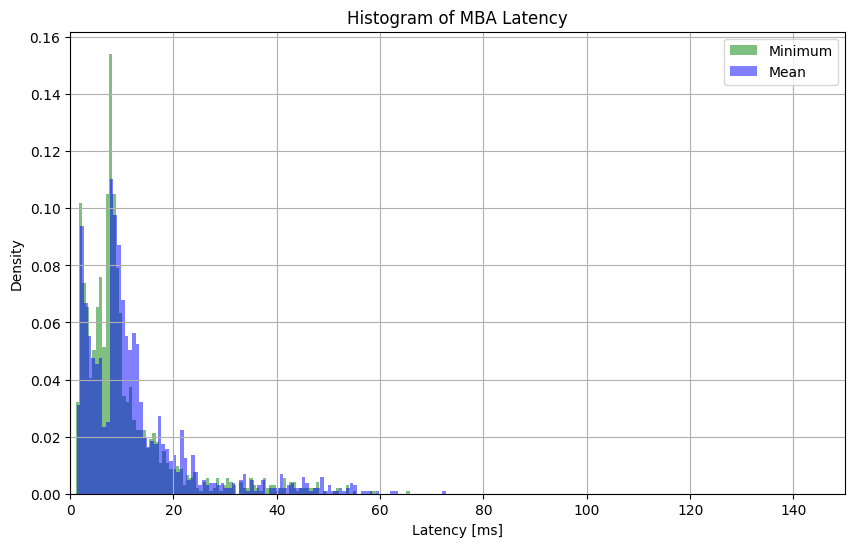

In [68]:
import matplotlib.pyplot as plt

# Create the histogram
plt.figure(figsize=(10, 6))

# Plot histogram for rural averages
plt.hist(mba_all_min, bins=100, alpha=0.5, color='green', label='Minimum', density=True)

# Plot histogram for urban averages
plt.hist(mba_all_mean, bins=100, alpha=0.5, color='blue', label='Mean', density=True)

# Plot histogram for urban averages
#plt.hist(mba_all_max, bins=100, alpha=0.5, color='red', label='Maximum', density=True)

# Add labels and title
plt.title("Histogram of MBA Latency")
plt.xlabel("Latency [ms]")
plt.ylabel("Density")
plt.xlim(0, 150)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

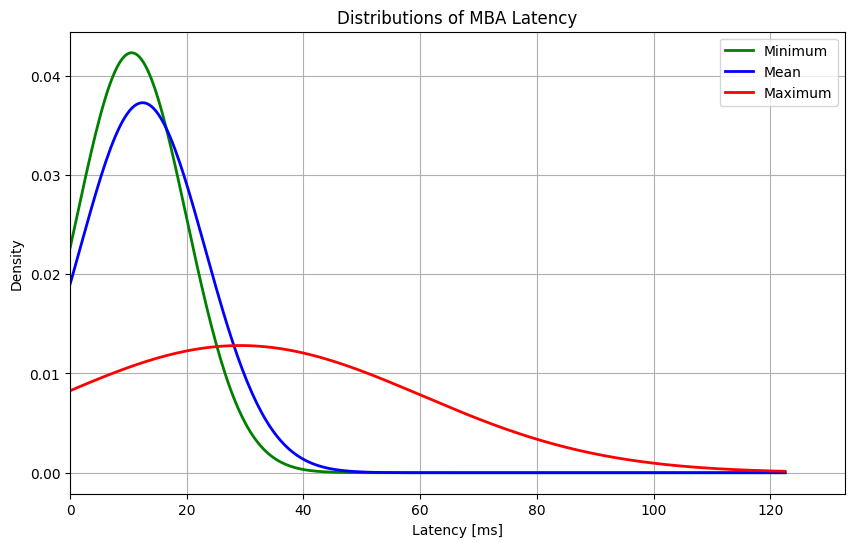

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Sample data: Replace these with your actual data
mean_1 = mba_all_min.mean()
std_1 = mba_all_min.std()
mean_2 = mba_all_mean.mean()
std_2 = mba_all_mean.std()
mean_3 = mba_all_max.mean()
std_3 = mba_all_max.std()

# Generate a sequence of x values
x_values = np.linspace(min(mean_1, mean_2, mean_3) - 3 * max(std_1, std_2, std_3),
                       max(mean_1, mean_2, mean_3) + 3 * max(std_1, std_2, std_3), 
                       num=500)

# Compute the y values for both distributions
y_values_1 = norm.pdf(x_values, loc=mean_1, scale=std_1)
y_values_2 = norm.pdf(x_values, loc=mean_2, scale=std_2)
y_values_3 = norm.pdf(x_values, loc=mean_3, scale=std_3)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the first normal distribution
plt.plot(x_values, y_values_1, linewidth=2, color='green', label='Minimum')

# Add the second normal distribution to the same plot
plt.plot(x_values, y_values_2, linewidth=2, color='blue', label='Mean')

# Add the third normal distribution to the same plot
plt.plot(x_values, y_values_3, linewidth=2, color='red', label='Maximum')

# Add labels and title
plt.title("Distributions of MBA Latency")
plt.xlabel("Latency [ms]")
plt.ylabel("Density")
plt.xlim(0, )

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


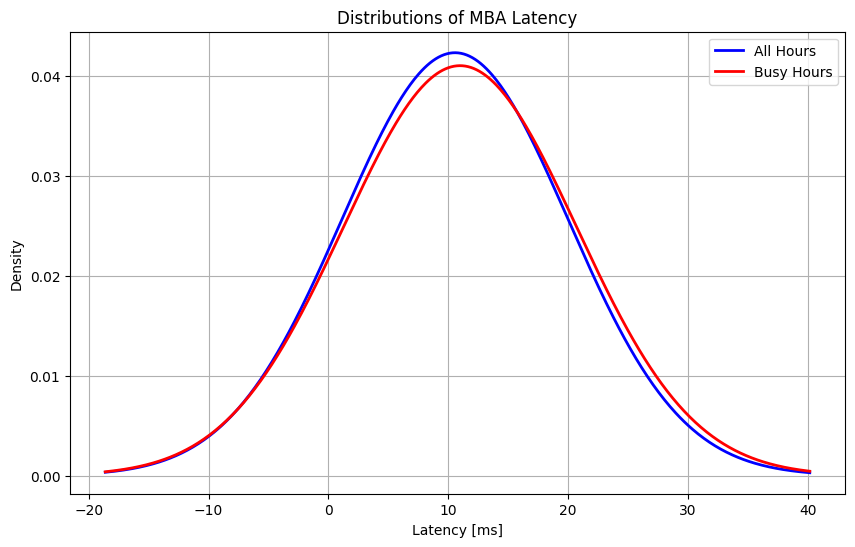

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Sample data: Replace these with your actual data
mean_1 = mba_all_min.mean()
std_1 = mba_all_min.std()
mean_2 = mba_busy_min.mean()
std_2 = mba_busy_min.std()


# Generate a sequence of x values
x_values = np.linspace(min(mean_1, mean_2) - 3 * max(std_1, std_2),
                       max(mean_1, mean_2) + 3 * max(std_1, std_2), 
                       num=500)

# Compute the y values for both distributions
y_values_1 = norm.pdf(x_values, loc=mean_1, scale=std_1)
y_values_2 = norm.pdf(x_values, loc=mean_2, scale=std_2)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the first normal distribution
plt.plot(x_values, y_values_1, linewidth=2, color='blue', label='All Hours')

# Add the second normal distribution to the same plot
plt.plot(x_values, y_values_2, linewidth=2, color='red', label='Busy Hours')

# Add labels and title
plt.title("Distributions of MBA Latency")
plt.xlabel("Latency [ms]")
plt.ylabel("Density")

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
